In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_file='/content/drive/MyDrive/Datasets/Sample_-_superstore.xls'

In [ ]:
xls = pd.ExcelFile(data_file)
data1 = pd.read_excel(xls, 'Orders')
data2 = pd.read_excel(xls, 'Returns')
data3 = pd.read_excel(xls, 'People')


In [ ]:
#Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).
#A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

In [ ]:
df1.rename(columns={'Row ID': 'ID','Order ID':'order_ID','Order Date':'order_date','Ship Date':'ship_date','Ship Mode':'ship_mode','Customer ID':'customer_ID',
                    'Customer Name':'customer_name','Segment':'segment','Country':'country','City':'city','State':'state','Postal Code':'postal_code','Region':'region',
                    'Product ID':'product_ID','Category':'category','Sub-Category':'sub_category','Product Name':'product_name','Sales':'sales',
                    'Quantity':'quantity','Discount':'discount','Profit':'profit','Returned':'returned'}, inplace=True)

In [ ]:
df1.shape

(9994, 21)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             9994 non-null   int64         
 1   order_ID       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_ID    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_ID     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub_category   9994 n

In [ ]:
df1.head(1)

,ID,order_ID,order_date,ship_date,ship_mode,customer_ID,customer_name,segment,country,city,...,postal_code,region,product_ID,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [ ]:
df2.head(1)

,Returned,Order ID
0,Yes,CA-2017-153822


In [ ]:
df2.rename(columns={'Returned':'returned','Order ID':'order_ID'},inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   returned  296 non-null    object
 1   order_ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [ ]:
df2.shape

(296, 2)

In [ ]:
df3.rename(columns={'Person':'person','Region':'region'},inplace=True)

df3.head(1)

,person,region
0,Anna Andreadi,West


In [ ]:
merged_df = pd.merge(df1, df2, left_on='order_ID', right_on='order_ID', how='left')
#merged_df = pd.merge(df1, df2, on='order_ID', how='left') --- another code to get same response


In [ ]:
# Fill missing values in the new column 'value2' with 'no'
merged_df['returned'].fillna('No', inplace=True)


In [ ]:
merged_df.head(1)

,ID,order_ID,order_date,ship_date,ship_mode,customer_ID,customer_name,segment,country,city,...,region,product_ID,category,sub_category,product_name,sales,quantity,discount,profit,returned
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,No


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             9994 non-null   int64         
 1   order_ID       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_ID    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_ID     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub_category   9994 n

In [ ]:
merged_df.shape

(9994, 22)

In [ ]:
df3.head(1)

,person,region
0,Anna Andreadi,West


In [ ]:
data = pd.merge(merged_df, df3, left_on='region', right_on='region', how='left')

data.head(1)

,ID,order_ID,order_date,ship_date,ship_mode,customer_ID,customer_name,segment,country,city,...,product_ID,category,sub_category,product_name,sales,quantity,discount,profit,returned,person
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,No,Cassandra Brandow


In [ ]:
data.shape

(9994, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             9994 non-null   int64         
 1   order_ID       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_ID    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_ID     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub_category   9994 n

In [ ]:
#To get category details
#unique_categories = data['category'].value_counts()
#print(unique_categories)

# To get the total number of unique categories
#total_categories = len(unique_categories)

#print(total_categories)

**Analyzing sales nd profit,  category and sub category wise using the Pie chart**

In [ ]:
#new_data= data[['ID','order_ID']]
#sal_cat = data.iloc[:, [14,17,20]]
sal_cat = data.groupby('category')['sales'].sum()

sal_cat = sal_cat.round(2)

sal_cat.head()

,sales
category,
Furniture,741999.80
Office Supplies,719047.03
Technology,836154.03


In [ ]:
#plt.figure(figsize=(6,4))
#plt.pie(sal_cat.values, labels=sal_cat.index, autopct='%1.1f%%', colors=['red','green','yellow'])
#plt.title('Distribution of Sales by Category')
#plt.show()

In [ ]:
#grouped_data = data.groupby(['category', 'sub_category']).size().reset_index(name='total')
cat_sub_sal = data.groupby(['category', 'sub_category'])['sales'].sum().reset_index()

cat_sub_sal['sales'] = cat_sub_sal['sales'].round(2)

cat_sub_sal.head(50)

,category,sub_category,sales
0,Furniture,Bookcases,114880.00
1,Furniture,Chairs,328449.10
2,Furniture,Furnishings,91705.16
3,Furniture,Tables,206965.53
4,Office Supplies,Appliances,107532.16
5,Office Supplies,Art,27118.79
6,Office Supplies,Binders,203412.73
7,Office Supplies,Envelopes,16476.40
8,Office Supplies,Fasteners,3024.28
9,Office Supplies,Labels,12486.31


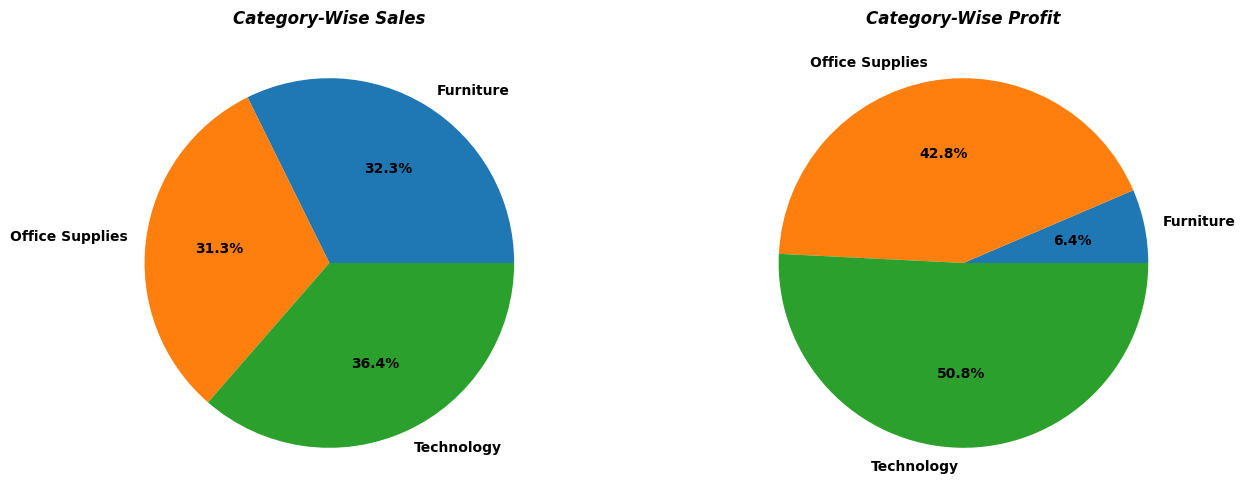

In [ ]:
cat_sal_prof = data.groupby('category')[['sales', 'profit']].sum()

# subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Cat_sales
axes[0].pie(cat_sal_prof['sales'], labels=cat_sal_prof.index, autopct='%1.1f%%', textprops={'weight': 'bold'})
axes[0].set_title('Category-Wise Sales', fontdict={'weight': 'bold', 'style': 'italic'})

# Cat_profit
axes[1].pie(cat_sal_prof['profit'], labels=cat_sal_prof.index, autopct='%1.1f%%', textprops={'weight': 'bold'})
axes[1].set_title('Category-Wise Profit', fontdict={'style': 'italic', 'weight': 'bold'})


plt.show()

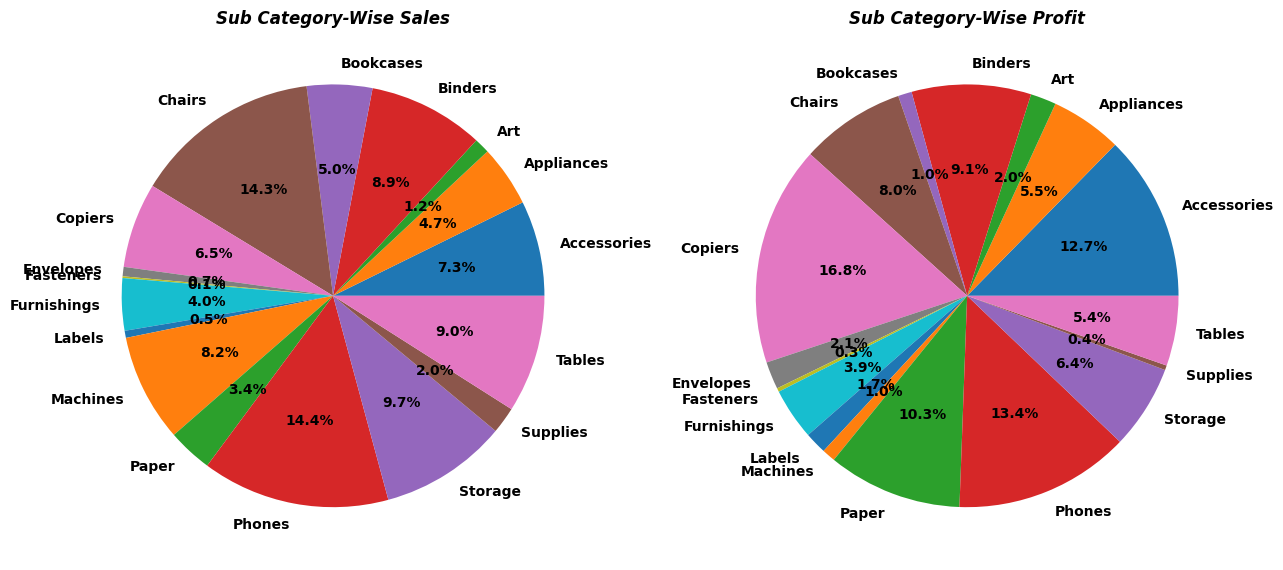

In [ ]:
sub_sal_prof = data.groupby('sub_category')[['sales', 'profit']].sum()

# subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Cat_sales
axes[0].pie(sub_sal_prof['sales'], labels=sub_sal_prof.index, autopct='%1.1f%%', textprops={'weight': 'bold'})
axes[0].set_title('Sub Category-Wise Sales', fontdict={'weight': 'bold', 'style': 'italic'})

# Cat_profit
axes[1].pie(abs(sub_sal_prof['profit']), labels=sub_sal_prof.index, autopct='%1.1f%%', textprops={'weight': 'bold'})
axes[1].set_title('Sub Category-Wise Profit', fontdict={'style': 'italic', 'weight': 'bold'})


plt.show()